In [1]:
import cv2 
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lectura y conversion de la imagen
im = cv2.imread('nocturnal.jpg', 1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.normalize(im.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

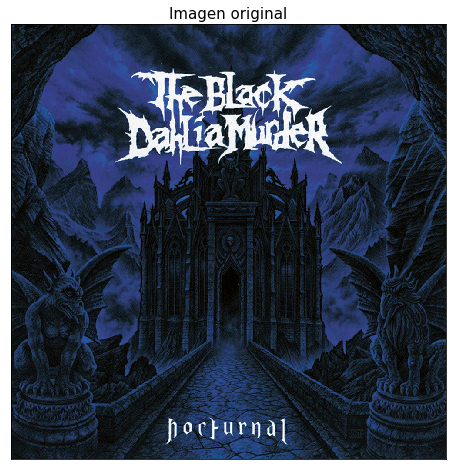

In [3]:
fig = plt.figure(figsize=(8,8))
plt.imshow(im)
plt.title('Imagen original', fontdict={'fontsize':15})
plt.xticks([])
plt.yticks([])
plt.show()

## Forma 1 de filtrar la imagen

In [4]:
# Filtro de bloques
kernel = 1/441 * np.ones((21, 21))

In [5]:
# Convolucion imagen con kernel en los 3 canales
imFR = signal.convolve2d(im[:,:,0], kernel, 'same')
imFG = signal.convolve2d(im[:,:,1], kernel, 'same')
imFB = signal.convolve2d(im[:,:,2], kernel, 'same')

In [6]:
# Unir los canales en una sola imagen
imF = np.zeros((im.shape[0], im.shape[1], 3))
imF[:,:,0] = imFR
imF[:,:,1] = imFG
imF[:,:,2] = imFB

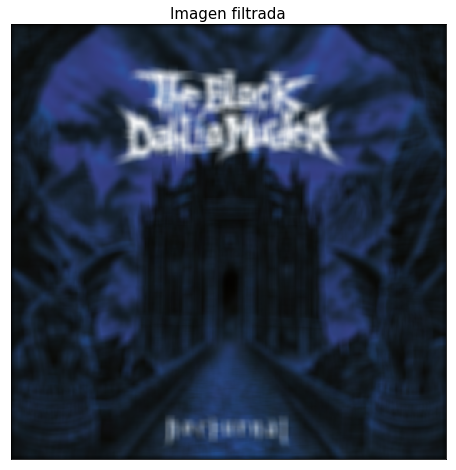

In [7]:
fig2 = plt.figure(figsize=(8,8))
plt.imshow(imF)
plt.title('Imagen filtrada', fontdict={'fontsize':15})
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
# Restar version borrosa a la imagen original
imNew = 0.3*im + 0.7*imF

In [9]:
# Unir las 3 imagenes (original y suma)
imAll = np.hstack((im, imNew))

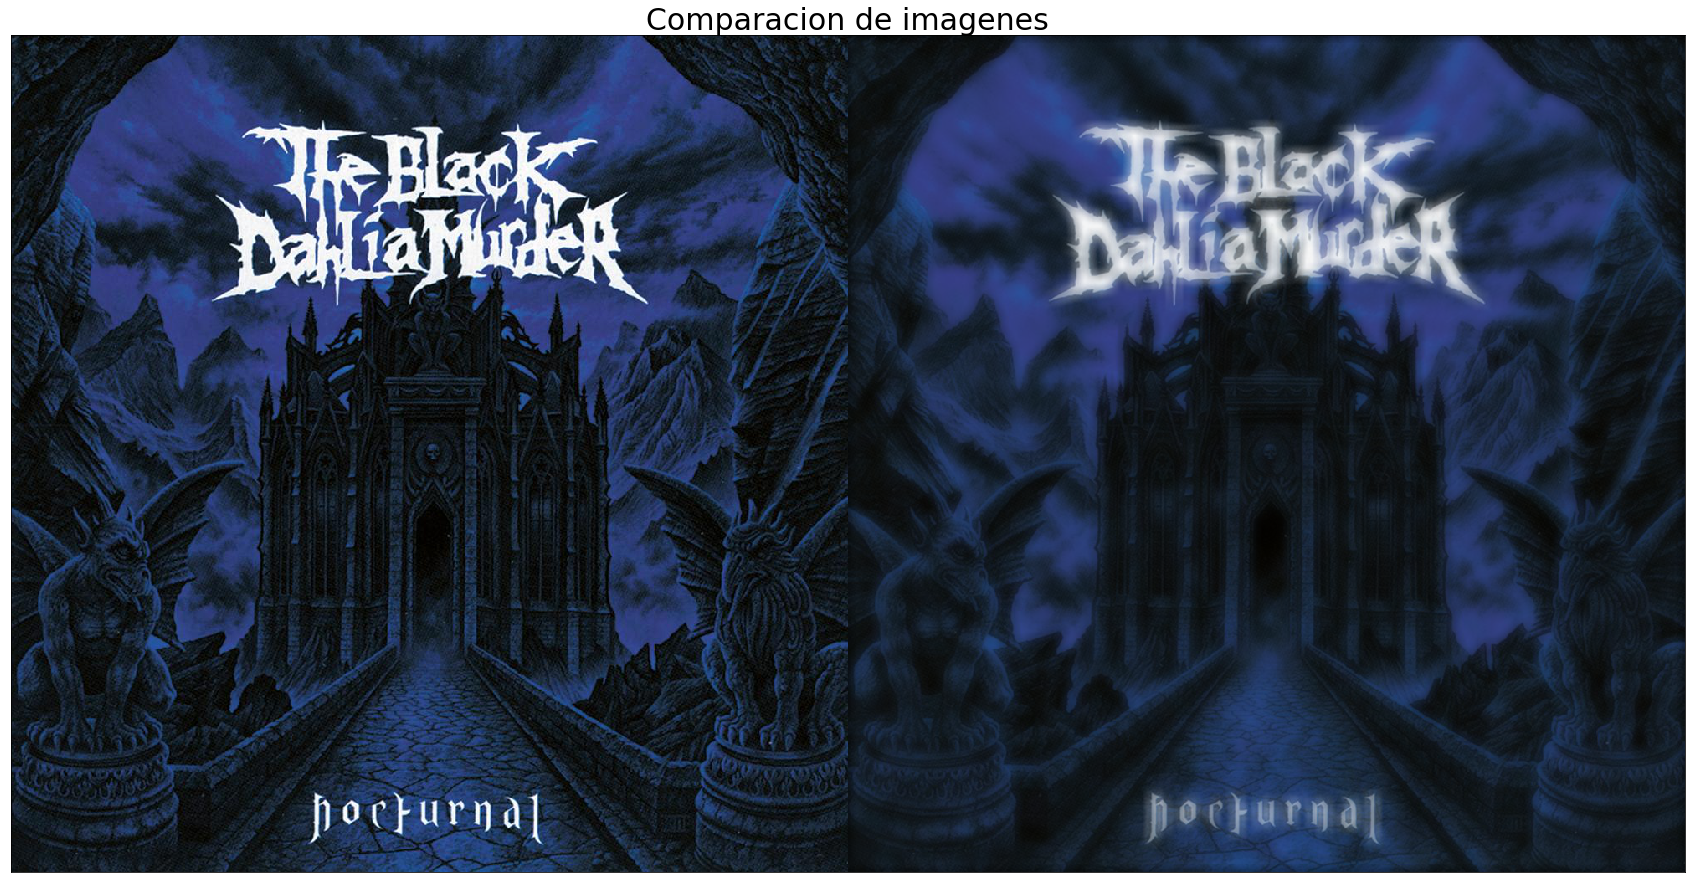

In [10]:
fig = plt.figure(figsize=(30,30))
plt.imshow(imAll)
plt.title('Comparacion de imagenes', fontdict={'fontsize':30})
plt.xticks([])
plt.yticks([])
plt.show()

## Forma 2 de filtrar la imagen

In [11]:
# Creacion del filtro equivalente
impulse = np.zeros((21,21))
impulse[10,10] = 1
mask = 0.3*impulse + 0.7*kernel

In [12]:
# Convolucion imagen con kernel en los 3 canales
imFR2 = signal.convolve2d(im[:,:,0], mask, 'same')
imFG2 = signal.convolve2d(im[:,:,1], mask, 'same')
imFB2 = signal.convolve2d(im[:,:,2], mask, 'same')

In [13]:
# Unir los canales en una sola imagen
imNew2 = np.zeros((im.shape[0], im.shape[1], 3))
imNew2[:,:,0] = imFR2
imNew2[:,:,1] = imFG2
imNew2[:,:,2] = imFB2

In [14]:
# Unir imagen original y suma
imAll2 = np.hstack((im, imNew2))

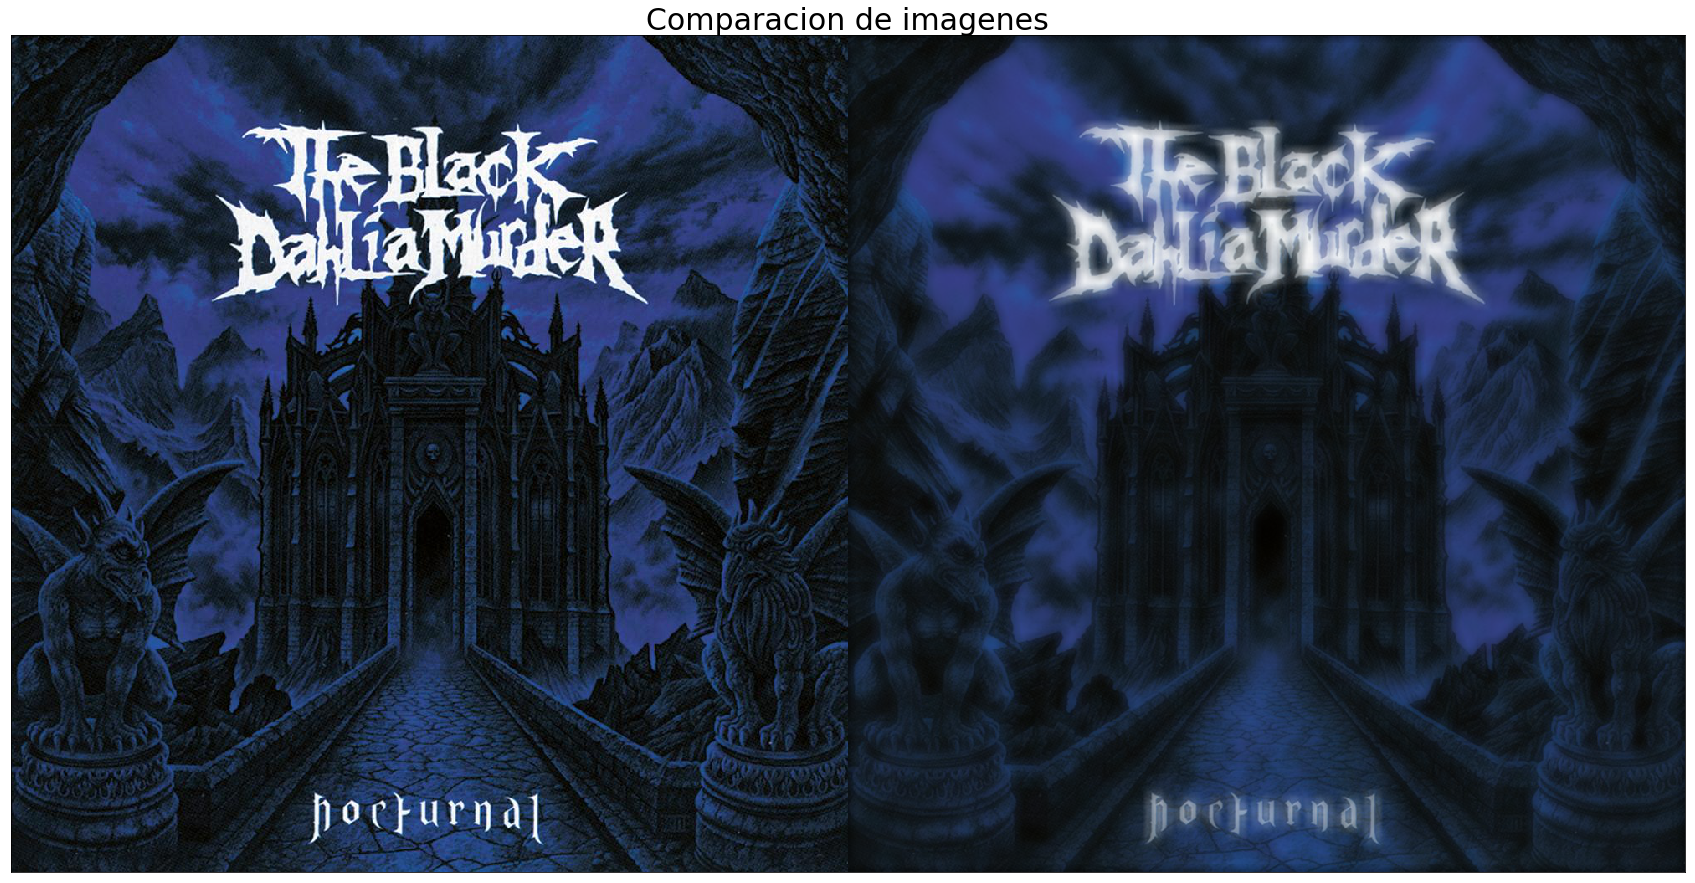

In [15]:
fig2 = plt.figure(figsize=(30,30))
plt.imshow(imAll2)
plt.title('Comparacion de imagenes', fontdict={'fontsize':30})
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
# Canal R (Forma 1)
imNew[0:3,0:3,0]

array([[0.03388111, 0.03694367, 0.03772798],
       [0.03666978, 0.03630875, 0.032493  ],
       [0.04189231, 0.03813259, 0.03325864]])

In [17]:
# Canal R (Forma 2)
imNew2[0:3,0:3,0]

array([[0.03388111, 0.03694367, 0.03772798],
       [0.03666978, 0.03630875, 0.032493  ],
       [0.04189231, 0.03813259, 0.03325864]])

In [18]:
# Canal G (Forma 1)
imNew[0:3,0:3,1]

array([[0.04177404, 0.0475319 , 0.04851541],
       [0.04774354, 0.04775599, 0.04651727],
       [0.05833178, 0.05497666, 0.04917523]])

In [19]:
# Canal G (Forma 2)
imNew2[0:3,0:3,1]

array([[0.04177404, 0.0475319 , 0.04851541],
       [0.04774354, 0.04775599, 0.04651727],
       [0.05833178, 0.05497666, 0.04917523]])

In [20]:
# Canal B (Forma 1)
imNew[0:3,0:3,2]

array([[0.05586679, 0.06065359, 0.06278245],
       [0.06257703, 0.06281357, 0.0615375 ],
       [0.07494553, 0.07183318, 0.06951758]])

In [21]:
# Canal G (Forma 2)
imNew2[0:3,0:3,2]

array([[0.05586679, 0.06065359, 0.06278245],
       [0.06257703, 0.06281357, 0.0615375 ],
       [0.07494553, 0.07183318, 0.06951758]])